In [55]:
# imports
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Flatten
from scikeras.wrappers import KerasClassifier
#from datascienceutils import DataScienceUtils as dsu
# Perform Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Importing Data

In [56]:
# use the scaled data
df = pd.read_csv('ProcessedData/train_scaled.csv')

In [57]:
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Overall_Experience
0,-0.986183,0.469409,0.832354,-0.667882,-1.046703,-1.660469,-0.384168,-0.261250,-0.729514,1.347471,...,-1.152971,-0.397119,-1.127257,-1.176984,-0.387739,-1.467601,0.521801,-1.479684,-1.812778,0
1,1.014010,0.469409,0.567700,1.497270,0.955380,0.215099,-0.148115,-0.390872,-1.502953,1.347471,...,-1.949232,0.367413,0.405643,1.221517,-1.171161,-2.332568,-1.065508,0.256870,0.499214,0
2,-0.986183,0.469409,0.236883,-0.667882,-1.046703,-0.892926,1.635395,2.694135,-0.729514,-0.851080,...,0.439551,1.131945,1.172093,1.221517,1.179105,1.127302,0.521801,1.125147,1.269878,1
3,-0.986183,0.469409,0.303047,-0.667882,-1.046703,-1.166284,-0.043202,0.075767,0.043925,-0.851080,...,-1.152971,-0.397119,-0.360807,-0.377484,-0.387739,-0.602633,0.521801,-0.611407,-0.271450,0
4,-0.986183,0.469409,0.700027,-0.667882,-1.046703,0.002054,-0.384168,-0.390872,0.043925,-0.118229,...,0.439551,1.131945,0.405643,0.422017,0.395683,0.262334,0.521801,0.256870,0.499214,1


# Data Preparation

## Splitting data into targets and features

In [75]:
# split data into features and target

# class
Y = df['Overall_Experience']

# features
X = df.drop(columns='Overall_Experience')


In [76]:
# get the features for the assessment dt
df_test: pd.DataFrame = pd.read_csv('ProcessedData/X_test_scaled.csv')

# get the ID's to add to the test data
IDs: pd.DataFrame = pd.read_csv('Data/Surveydata_test.csv')['ID']

In [77]:
# inspect the data
df_test.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,-0.986183,0.469409,-0.226260,-0.667882,-1.046703,-1.407540,-0.384168,-0.390872,0.043925,-0.118229,...,-0.950629,1.235812,0.367413,1.172093,1.221517,1.179105,1.127302,0.521801,1.125147,-1.812778
1,-0.986183,-2.130340,-1.218710,-0.667882,-1.046703,-0.538825,-0.148115,0.335012,-1.502953,0.614621,...,-0.190733,-1.949232,-0.397119,-0.360807,1.221517,-0.387739,0.262334,-0.271854,1.125147,-0.271450
2,1.014010,0.469409,1.361660,-0.667882,-1.046703,0.829911,-0.384168,-0.390872,1.590803,1.347471,...,1.329060,1.235812,1.131945,-1.127257,-1.176984,-1.171161,-1.467601,0.521801,-1.479684,1.269878
3,-0.986183,0.469409,-0.689404,1.497270,0.955380,-0.609840,-0.384168,-0.390872,0.043925,1.347471,...,-1.710526,-0.356710,1.131945,-1.893707,-0.377484,-1.171161,1.127302,1.315456,1.125147,-1.812778
4,1.014010,-2.130340,-1.417201,-0.667882,-1.046703,-0.358856,0.061710,-0.390872,1.590803,0.614621,...,1.329060,1.235812,1.131945,1.172093,0.422017,-0.387739,1.127302,1.315456,1.125147,1.269878


## Split the Data into test and training sets

In [78]:
# split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [79]:
# cast the target to integers
Y_train = Y_train.astype(int)

In [80]:
# inspect the distribution of the target variable
class_dist = Y_train.value_counts()

# get the class weights based on the distribution of the dataset
class_weights_freq = class_dist.sum() / class_dist

# get the normalized class weights
class_weights_normalized = Y_train.value_counts(normalize=True)

In [81]:
# convert data to numpy, so index is reset
Y_train = Y_train.to_numpy()

# Model evaluation functions

In [11]:
def train_validation_loss_plot(hist):
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'])
    ax.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [12]:
def get_best_threshold(mdl):
    
    # get the models predictions on the test set
    Y_hat: np.ndarray = mdl.predict(X_test)
    
    # keep probabilities for the positive outcomes only
    # i.e. get a 1d array of the positive outcomes only
    Y_hat: np.ndarray = Y_hat[:, 0]
    
    # calculate the roc curves
    fpr, tpr, thresholds = roc_curve(Y_test, Y_hat)
    
    # calculate the gmeans for each threshold
    gmeans: np.ndarray = np.sqrt(tpr * (1-fpr))
    
    idx: int = np.argmax(gmeans)
    
    return thresholds[idx]

In [13]:
def plot_roc_curve(mdl):
    
    # get the models predictions on the test set
    Y_hat: np.ndarray = mdl.predict(X_test)
    
    # keep probabilities for the positive outcomes only
    # i.e. get a 1d array of the positive outcomes only
    Y_hat: np.ndarray = Y_hat[:, 0]
    
    # calculate the roc curves
    fpr, tpr, thresholds = roc_curve(Y_test, Y_hat)
    
    # calculate the gmeans for each threshold
    gmeans: np.ndarray = np.sqrt(tpr * (1-fpr))
    
    idx: int = np.argmax(gmeans)
    
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[idx], gmeans[idx]))
    
    fig, ax = plt.subplots()
    
    # plot the roc curve for the model
    ax.plot([0,1], [0,1], linestyle='--', label='No Skill')
    ax.plot(fpr, tpr, marker='.')
    ax.scatter(fpr[idx], tpr[idx], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    
    return thresholds[idx]

In [14]:
def make_confusion_matrix(mdl,threshold = 0.5):
    
    # get predictions using the test data

    # make predictions on the model
    y_pred: np.ndarray = mdl.predict(X_test)[:, 0]
    
    Y_pred_threshold: np.ndarray = (y_pred > threshold)
    
    cm = confusion_matrix(Y_test, Y_pred_threshold)

    cm[[0, 1]] = cm[[1, 0]]
    
    cm[:, [0, 1]] = cm[:, [1, 0]]

    cm_df = pd.DataFrame(cm, columns=["Predicted Leaving", "Predicted Staying"], index=["Leaving", "Staying"])
    
    TP = cm_df.loc['Leaving', 'Predicted Leaving']
    FP = cm_df.loc['Staying', 'Predicted Leaving']
    TN = cm_df.loc['Staying', 'Predicted Staying']
    FN = cm_df.loc['Leaving', 'Predicted Staying']

    precision = TP / (TP + FP)  # out of my true predictions, what percentage did I get right?
    recall = TP / (TP + FN)  # how many of people that are leaving am I discovering?
    fpr = FP / (FP + TN)  # out of the ones that are staying, how many did I predict are leaving?
    fdr = FP / (FP + TN)
    
    print(f"Precision/TPR: {precision}")
    print(f"Recall: {recall}")
    print(f"False Positive Rate: {fpr}")
    print(f"False Discovery Rate: {fdr}")

In [15]:
# now need a way to evaluate the model 
def evaluate_model(mdl, mdl_hist):
    
    print(f"Train Loss vs validation loss:\n")
    train_validation_loss_plot(mdl_hist)
    
    print(f"ROC curve for model:\n")
    threshold = plot_roc_curve(mdl)
    
    print(f"Model Confusion matrix:\n")
    make_confusion_matrix(mdl, threshold)

In [16]:
def fix_generator_seeds():
    
    # not sure what this does
    tf.keras.backend.clear_session()
    #Fix the seed for the different random number generators

    # fix seed for numpy
    np.random.seed(42)
    
    # fix seed for python
    random.seed(42)
    
    # fix seed for tensorflow
    tf.random.set_seed(42)

In [17]:
def assess_model(mdl, threshold, file_name):
    
    print('Making prediction on the test set.')
    # make predictions on the test data
    y: np.ndarray = mdl.predict(df_test)

    # get the positive cases
    y: np.ndarray = y[:, 0]

    print('Obtaining values > threshold.')
    # get only values greater than threshold and cast to int
    y: np.ndarray = (y > threshold).astype(int)
    
    print('Converting to dataframe.')
    # convert to a dataframe
    y_df = pd.DataFrame({'ID': IDs, "Overall_Experience": y})
    
    print('Saving as csv.')
    # print for submission
    y_df.to_csv(f'Predictions/{file_name}.csv', index=False)
    
    print('Done.')

In [18]:
# function to compute a models classification report
# inspect the classification report
def make_classification_report(mdl, th):
    
    # make a prediction using the model
    y: np.ndarray = mdl.predict(X_test)
    
    y = (y[:, 0] > th).astype(int)
    
    print(classification_report(Y_test, y))

# Model Building

# Model 1

4 hidden layers. 

HL 1: 256 Nodes.
HL 2: 128 Nodes. 
HL 3: 64 Nodes. 
HL 4: 32 Nodes. 

Train for 50 epochs.

Learning Rate: 0.01.

No regularization techniques are used initially. 

In [147]:
# fix the generator seed
fix_generator_seeds()

In [148]:
# initialize a sequenctial model 
model = Sequential()

In [149]:
model.add(Input(shape=(X_train.shape[1], )))

model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
# fit the data to the model
hist = model.fit(X_train, Y_train,
                 validation_split=0.3,
                 epochs=50,
                 class_weight={1: 0.55, 0: 0.45},
                 batch_size=64,
                 verbose=1)
                 #callbacks=[early_stopping])

Epoch 1/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8875 - loss: 0.1333 - val_accuracy: 0.9224 - val_loss: 0.1984
Epoch 2/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9248 - loss: 0.0942 - val_accuracy: 0.9293 - val_loss: 0.1851
Epoch 3/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9316 - loss: 0.0878 - val_accuracy: 0.9291 - val_loss: 0.1777
Epoch 4/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9341 - loss: 0.0832 - val_accuracy: 0.9312 - val_loss: 0.1709
Epoch 5/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9349 - loss: 0.0806 - val_accuracy: 0.9293 - val_loss: 0.1762
Epoch 6/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9383 - loss: 0.0776 - val_accuracy: 0.9350 - val_loss: 0.1591
Epoch 7/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9399 - loss: 0.0751 - val_accuracy: 0.9366 - val_loss: 0.1625
Epoch 8/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9414 - loss: 0.0734 - val_accuracy: 0.

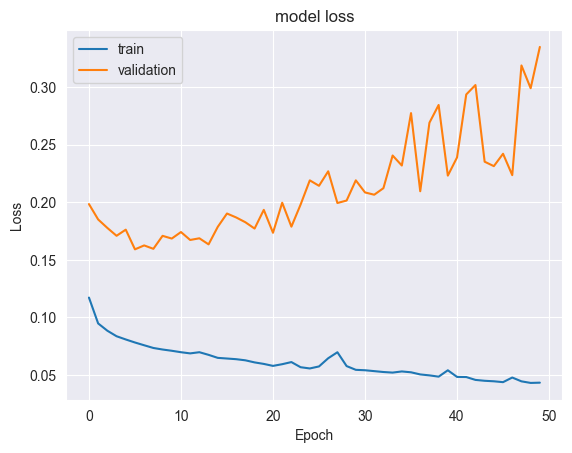

In [153]:
# plot the loss curve
train_validation_loss_plot(hist)

The baseline model is overfitting. The accuracy of the model on the training set is ~ 0.96, however the accuracy on the validation set is ~ 0.94. The network has learned patterns that are too specific to the training set, causing it to under perform on unseen data. After about approximately 5 iterations, the validation loss increases, as the model loses its ability to generalize.

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best Threshold=0.524587, G-Mean=0.938


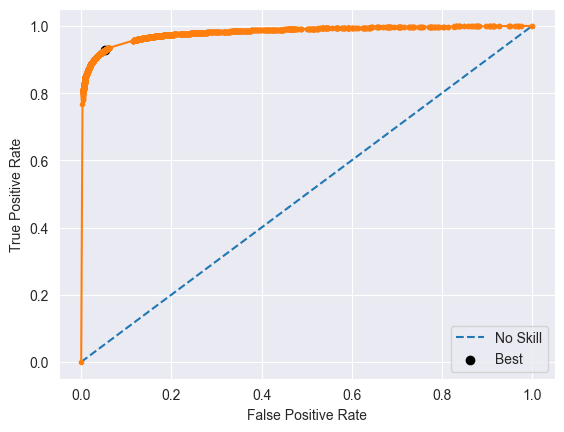

In [158]:
# plot the roc curve
threshold = plot_roc_curve(model)

In [159]:
make_confusion_matrix(model, threshold)

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision/TPR: 0.9555791288205264
Recall: 0.9282540091453597
False Positive Rate: 0.05239696566825682
False Discovery Rate: 0.05239696566825682


In [162]:
make_classification_report(model, threshold)

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     12787
           1       0.96      0.93      0.94     15527

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314


The model performs reasonably well using the optimal threshold. The macro accuracy is 0.94. The precision is ~0.96 and recall is ~ 0.93. The model performs less well at predicting the '0' class, possible due to the class imbalance.

# Model 1

4 hidden layers. 

HL 1: 256 Nodes.
HL 2: 128 Nodes. 
HL 3: 64 Nodes. 
HL 4: 32 Nodes. 

Train for 50 epochs.

Learning Rate: 0.01.

To manage overfitting we will use a dropout of 0.1 at each layer.

In [163]:
# fix the generator seeds
fix_generator_seeds()

In [164]:
# intialize a sequential model 
model1 = Sequential()

In [165]:
# input layer
model1.add(Input(shape=(X_train.shape[1], )))

model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.1))

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.1))

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.1))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.1))

model1.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [166]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,153 (192.00 KB)

 Trainable params: 49,153 (192.00 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
# initialize an optimizer instance
optimizer = tf.keras.optimizers.Adam(0.01)

In [168]:
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [169]:
hist1 = model1.fit(X_train, Y_train, batch_size = 64, epochs = 50, verbose = 1, validation_split = 0.3)

Epoch 1/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8865 - loss: 0.2832 - val_accuracy: 0.9168 - val_loss: 0.2161
Epoch 2/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9189 - loss: 0.2089 - val_accuracy: 0.9241 - val_loss: 0.1932
Epoch 3/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9226 - loss: 0.1977 - val_accuracy: 0.9275 - val_loss: 0.1999
Epoch 4/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9269 - loss: 0.1925 - val_accuracy: 0.9294 - val_loss: 0.1864
Epoch 5/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9298 - loss: 0.1837 - val_accuracy: 0.9320 - val_loss: 0.1801
Epoch 6/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9306 - loss: 0.1792 - val_accuracy: 0.9302 - val_loss: 0.1786
Epoch 7/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9311 - loss: 0.1788 - val_accuracy: 0.9349 - val_loss: 0.1649
Epoch 8/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9325 - loss: 0.1774 - val_accuracy: 0.

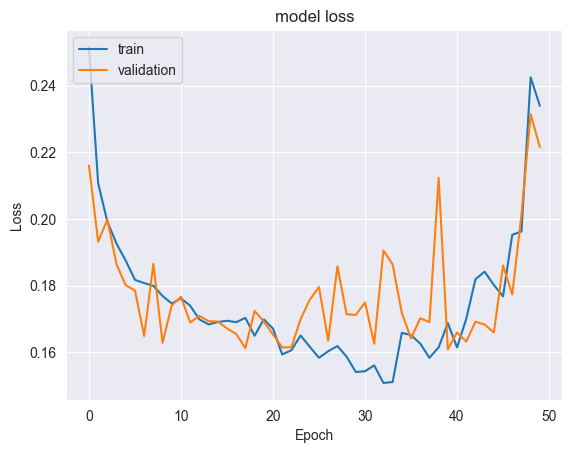

In [172]:
train_validation_loss_plot(hist1)

The training loss and validation loss curves are following each other more closely now. Adding dropout has assisted in preventing overfitting. However, after the 20th epoch the model begins to overfit again.

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best Threshold=0.739266, G-Mean=0.927


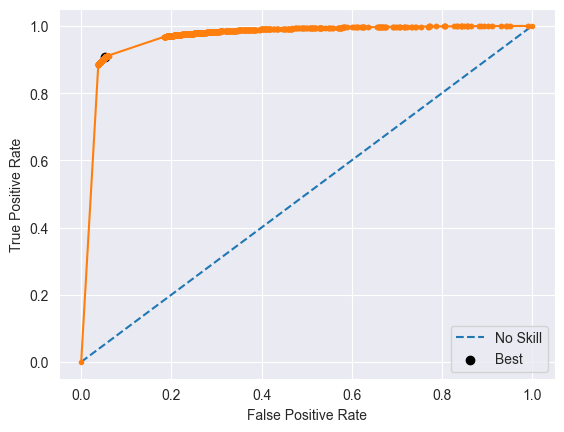

In [170]:
# inspect the roc curve
threshold1 = plot_roc_curve(model1)

In [171]:
# inspect the training vs validation loss
make_classification_report(model1, threshold1)

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12787
           1       0.95      0.91      0.93     15527

    accuracy                           0.92     28314
   macro avg       0.92      0.93      0.92     28314
weighted avg       0.93      0.92      0.92     28314


Overall the model's accuracy, precision and recall have decreased.

# Model 2

4 hidden layers. 

HL 1: 256 Nodes.
HL 2: 128 Nodes. 
HL 3: 64 Nodes. 
HL 4: 32 Nodes. 

Train for 50 epochs.

Learning Rate: 0.01.

Dropout of 0.1 a each layer. 

Early stopping after 7 successive similar loss values.

In [180]:
# fix the generator seeds
fix_generator_seeds()

In [181]:
# intialize a sequential model 
model2 = Sequential()

In [182]:
# input layer
model2.add(Input(shape=(X_train.shape[1], )))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [183]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,153 (192.00 KB)

 Trainable params: 49,153 (192.00 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
# Define the EarlyStopping callback to prevent the model from overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., 'val_loss' or 'val_accuracy')
    patience=5,  # Number of epochs with no improvement after which training stops
    restore_best_weights=True  # Restore the weights from the epoch with the best value of the monitored metric
)

In [185]:

# fit the data to the model
hist2 = model2.fit(X_train, Y_train,
                 validation_split=0.3,
                 epochs=50,
                 class_weight={1: 0.55, 0: 0.45},
                 batch_size=64,
                 verbose=1,
                 callbacks=[early_stopping])

Epoch 1/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8849 - loss: 0.1407 - val_accuracy: 0.9061 - val_loss: 0.2348
Epoch 2/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9187 - loss: 0.1048 - val_accuracy: 0.9272 - val_loss: 0.1983
Epoch 3/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9236 - loss: 0.0987 - val_accuracy: 0.9267 - val_loss: 0.1873
Epoch 4/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9278 - loss: 0.0946 - val_accuracy: 0.9337 - val_loss: 0.1920
Epoch 5/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9287 - loss: 0.0917 - val_accuracy: 0.9315 - val_loss: 0.1762
Epoch 6/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9307 - loss: 0.0904 - val_accuracy: 0.9296 - val_loss: 0.1778
Epoch 7/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9301 - loss: 0.0916 - val_accuracy: 0.9266 - val_loss: 0.1825
Epoch 8/50
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9311 - loss: 0.0900 - val_accuracy: 0.

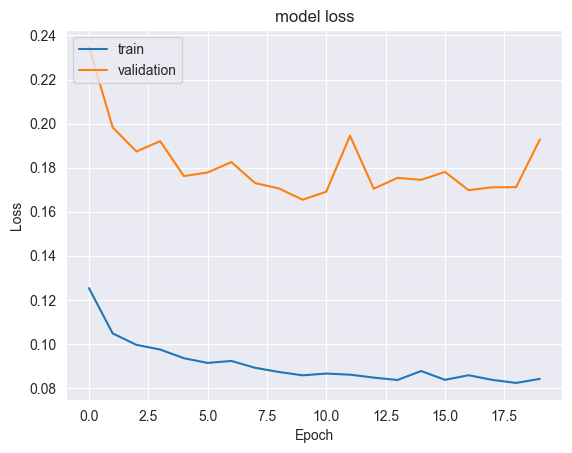

In [186]:
train_validation_loss_plot(hist2)

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best Threshold=0.518372, G-Mean=0.936


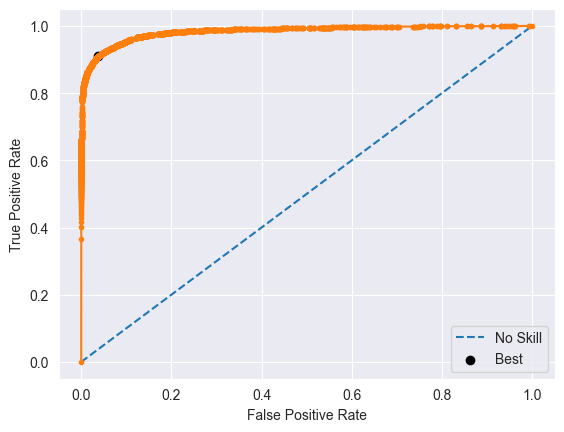

In [187]:
threshold2 = plot_roc_curve(model2)

In [188]:
make_classification_report(model2, threshold2)

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12787
           1       0.97      0.91      0.94     15527

    accuracy                           0.93     28314
   macro avg       0.93      0.94      0.93     28314
weighted avg       0.94      0.93      0.93     28314


The validation loss is smoother than it was previously.

# Model 3

Model 3 will be learned through a random search.

In [102]:
# fix the generator seeds
fix_generator_seeds()

In [103]:
class NNClassifier(ClassifierMixin, BaseEstimator):
    # constructor
    def __init__(self, build_fn, learning_rate=0.001, batch_size=32, epochs=20,verbose=2):
        self.build_fn = build_fn
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.verbose = verbose
        self.model_ = None

    # fit method
    def fit(self, X, y, **fit_params):
        # Use sample_weight if provided in fit_params
        try:
            sample_weight = fit_params.get("sample_weight")
            self.model_ = self.build_fn(learning_rate=self.learning_rate)
            self.model_.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=self.verbose, sample_weight=sample_weight, validation_split=0.3)
        except Exception as e:
            print(f"Training Failed: {e}")
            self.model_ = None
            return self

    def predict(self, X):
        return (self.model_.predict(X).flatten() > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model_.predict(X)

    def score(self, X, y, sample_weight=None):
        y_pred = self.predict(X)
        print("y_pred shape:", y_pred.shape)
        print("y shape:", y.shape)
        print("y_pred values:", np.unique(y_pred))
        print("y values:", np.unique(y))
        try:
            
            accuracy_score(y, y_pred, sample_weight=sample_weight)
        except Exception as e:
            print(f"Error in scoring: {e}")
            return 0
        return 

In [104]:
# Function to generate the model
def create_model3(learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], )))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [105]:
# Instantiate the custom wrapper
estimator_mod3 = NNClassifier(build_fn=create_model3, verbose=2)

# Define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [16 ,32, 64, 128]

param_random = dict(learning_rate=learn_rate, batch_size=batch_size)

In [106]:
# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=estimator_mod3, 
    param_distributions=param_random, 
    n_iter=2, # Number of different combinations to try
    scoring='accuracy', 
    cv=3, # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

In [107]:
# Fit random search
random_search_result = random_search.fit(X_train, Y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Epoch 1/20
362/362 - 4s - 10ms/step - accuracy: 0.7482 - loss: 1.3857 - val_accuracy: 0.7594 - val_loss: 0.5590
Epoch 2/20
362/362 - 1s - 3ms/step - accuracy: 0.6182 - loss: 0.6924 - val_accuracy: 0.5462 - val_loss: 0.6904
Epoch 3/20
362/362 - 1s - 3ms/step - accuracy: 0.6028 - loss: 0.6719 - val_accuracy: 0.5462 - val_loss: 0.6895
Epoch 4/20
362/362 - 1s - 3ms/step - accuracy: 0.5887 - loss: 0.6836 - val_accuracy: 0.5462 - val_loss: 0.6893
Epoch 5/20
362/362 - 1s - 3ms/step - accuracy: 0.5806 - loss: 0.6801 - val_accuracy: 0.5462 - val_loss: 0.6893
Epoch 6/20
362/362 - 1s - 3ms/step - accuracy: 0.5868 - loss: 0.6791 - val_accuracy: 0.5462 - val_loss: 0.6904
Epoch 7/20
362/362 - 1s - 3ms/step - accuracy: 0.5777 - loss: 0.6819 - val_accuracy: 0.5462 - val_loss: 0.6901
Epoch 8/20
362/362 - 1s - 3ms/step - accuracy: 0.5585 - loss: 0.7324 - val_accuracy: 0.5462 - val_loss: 0.6891
Epoch 9/20
362/362 - 1s - 3ms/step - accuracy: 0.541

In [108]:
# Output best parameters and accuracy
print("Best Parameters: ", random_search_result.best_params_)
print("Best Accuracy: ", random_search_result.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'batch_size': 128}
Best Accuracy:  nan


In [100]:
model3 = random_search_result.best_estimator_

In [109]:
random_search_result.cv_results_

{'mean_fit_time': array([44.60744127, 44.0265425 ]),
 'std_fit_time': array([0.46785154, 0.48158461]),
 'mean_score_time': array([0.00366632, 0.01798932]),
 'std_score_time': array([0.00124775, 0.01019199]),
 'param_learning_rate': masked_array(data=[0.1, 0.01],
              mask=[False, False],
        fill_value=1e+20),
 'param_batch_size': masked_array(data=[128, 128],
              mask=[False, False],
        fill_value=999999),
 'params': [{'learning_rate': 0.1, 'batch_size': 128},
  {'learning_rate': 0.01, 'batch_size': 128}],
 'split0_test_score': array([nan, nan]),
 'split1_test_score': array([nan, nan]),
 'split2_test_score': array([nan, nan]),
 'mean_test_score': array([nan, nan]),
 'std_test_score': array([nan, nan]),
 'rank_test_score': array([1, 1])}

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Best Threshold=inf, G-Mean=0.000


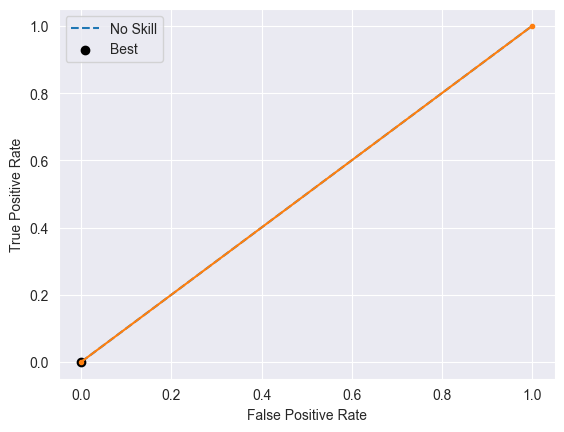

In [237]:
threshold3 = plot_roc_curve(model3)

In [238]:
make_classification_report(model3, threshold3)

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.45      1.00      0.62     12787
           1       0.00      0.00      0.00     15527

    accuracy                           0.45     28314
   macro avg       0.23      0.50      0.31     28314
weighted avg       0.20      0.45      0.28     28314


# Model 4 -cnn

## Function to initialize the CNN Model

In [46]:
X_train_reshaped = X_train.to_numpy()

In [47]:

# Reshape the data to add an extra dimension
X_train_reshaped = X_train_reshaped.reshape((X_train.shape[0], X_train.shape[1], 1))

In [48]:

# Create a CNN model to utilize weight sharing
def create_cnn_model(input_shape):
    model = Sequential()

    # Input Layer with Conv1D
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    # Additional Conv1D layer for feature extraction
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Flatten the outputs
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    # Output Layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [49]:

# Instantiate the model
input_shape = (X_train_reshaped.shape[1], 1)  # (22 features, 1 channel)
cnn_model = create_cnn_model(input_shape=input_shape)

# Model Summary
cnn_model.summary()

# Fit the model (assuming Y_train is prepared)
history = cnn_model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 32)          │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,953 (38.88 KB)

 Trainable params: 9,953 (38.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8434 - loss: 0.3597 - val_accuracy: 0.9063 - val_loss: 0.2272
Epoch 2/10
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9039 - loss: 0.2299 - val_accuracy: 0.9170 - val_loss: 0.2017
Epoch 3/10
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9167 - loss: 0.2078 - val_accuracy: 0.9223 - val_loss: 0.1904
Epoch 4/10
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9220 - loss: 0.1949 - val_accuracy: 0.9235 - val_loss: 0.1850
Epoch 5/10
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9259 - loss: 0.1863 - val_accuracy: 0.9246 - val_loss: 0.1805
Epoch 6/10
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9286 - loss: 0.1799 - val_accuracy: 0.9281 - val_loss: 0.1750
Epoch 7/10
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9313 - loss: 0.1756 - val_accuracy: 0.9279 - val_loss: 0.1748
Epoch 8/10
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9325 - loss: 0.1715 - 

Train Loss vs validation loss:


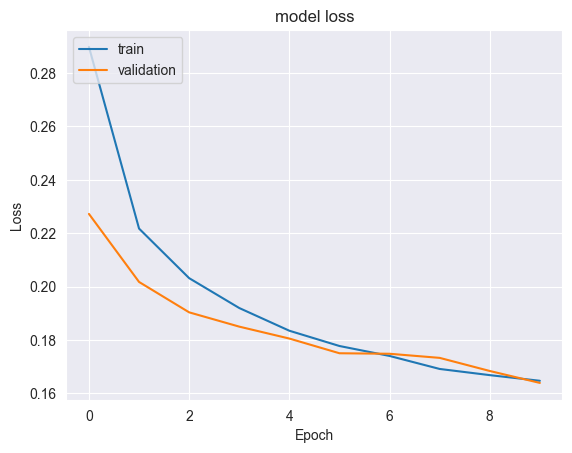

ROC curve for model:

885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Best Threshold=0.465550, G-Mean=0.935


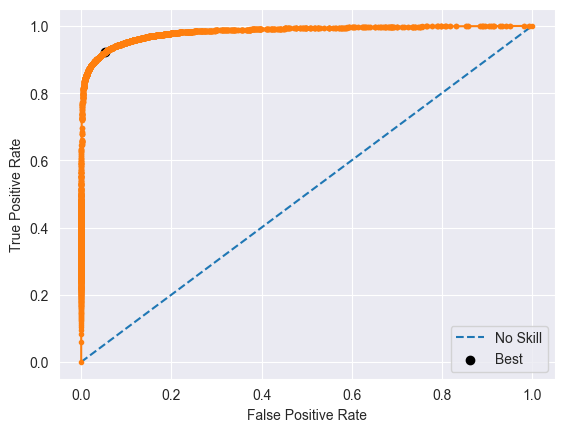

Model Confusion matrix:

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision/TPR: 0.954230973922299
Recall: 0.9238101371803954
False Positive Rate: 0.05380464534292641
False Discovery Rate: 0.05380464534292641


In [50]:
evaluate_model(cnn_model, history)

In [54]:
threshold = get_best_threshold(cnn_model)

make_classification_report(cnn_model, threshold)

885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     12787
           1       0.95      0.92      0.94     15527

    accuracy                           0.93     28314
   macro avg       0.93      0.94      0.93     28314
weighted avg       0.93      0.93      0.93     28314
